<a href="https://colab.research.google.com/github/ShineySun/BASIC_AI/blob/master/AI_Study1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 관련 라이브러리
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Data 생성 & 시각화
### 변수 X는 0~2 사이의 균일한 확률분포의 실수 난수
### 변수 y는 기울기가 y 이며 절편이 4인 선형 그래프에 정규 분포된 노이즈(noise)를 추가

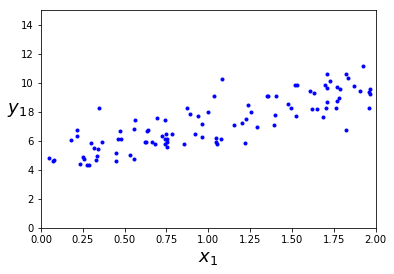

In [0]:
# np.random.rand(100,1) : 0 ~ 1사이에서 균일한 확률 분포로 실수 난수 생성(100개의 데이터, 1차원)
X = 2*np.random.rand(100,1)
# np.random.randn(100,1) : 기댓값이 0이고 표준편차가 1인 가우시안 표준 정규 분포를 따르는 난수를 생성
y = 4 + 3*X + np.random.randn(100,1)

# Blue Color 로 X, y 데이터 출력
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize = 18)
plt.ylabel("$y_1$",rotation = 0, fontsize = 18)
# plt.axis([x_start, x_end, y_start, y_end])
plt.axis([0,2,0,15])
plt.show()

# print(X)

# 정규 방정식을 사용한 선형 회귀 접근
## 정규 방정식을 사용한 theta_best 계산
### theta_best의 index 0 은 y 절편을 의미, index 1 은 기울기를 의미


In [0]:
### 정규 방정식을 사용한 선형회귀 접근 ###

# np.c_[a,b] : 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기
X_b = np.c_[np.ones((100,1)),X]
#print(X_b)

## np.linalg_inv : 선형대수 역행렬
# theta best --> 정규 방정식으로 계산한 theta 값
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# theta[0] : y 절편 , theta[1] : 기울기
print(theta_best)

[[4.62091109]
 [2.57516025]]


## 정규 방정식을 이용한 theta_best 의 값으로 예측 모델 시각화

In [0]:
X_new = np.array([[0],[2]])
# bias 가 포함된 X 행렬
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)

print("X_new_b : ")
print(X_new_b)
print(y_predict)

X_new_b : 
[[1. 0.]
 [1. 2.]]
[[4.62091109]
 [9.77123159]]


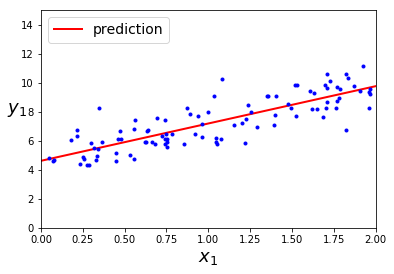

In [0]:
plt.plot(X_new,y_predict,"r-",linewidth = 2, label="prediction")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize = 18)
plt.ylabel("$y_1$",rotation = 0, fontsize = 18)
# plt.legend : 추가적인 입력변수를 출력하는 요소 설정
plt.legend(loc="upper left", fontsize = 14)
plt.axis([0,2,0,15])
plt.show()

# Package를 이용한 선형 회귀 모델 생성
## 정규 방정식의 값과 거의 비슷

In [0]:
from sklearn.linear_model import LinearRegression

# LinearRegression 클래스 객체 생성
lin_reg = LinearRegression()
# 모형 추정. 상수항 결합을 자동적으로 해줌.
lin_reg.fit(X,y)

print(lin_reg.coef_, lin_reg.intercept_)

[[2.57516025]] [4.62091109]


In [0]:
#print(X_new[0])
lin_reg.predict(X_new)

array([[4.62091109],
       [9.77123159]])

In [0]:
# np.linalg.lstsq : Compute the Least-squares solution(최소제곱합)
# return Least-squares solution, Sums of residuals(잔차), Rank of matrix a, Singular values of a
# 행렬이 정사각행렬이 아닐때 역행렬을 구하기 위함 -> lstsq, pinv
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond = 1e-6)

print("< theta_best_svd >")
print(theta_best_svd)

< theta_best_svd >
[[4.62091109]
 [2.57516025]]


In [0]:
# X_b : 100 x 2,  y : 100 x 1
np.linalg.pinv(X_b).dot(y)

array([[4.62091109],
       [2.57516025]])

# 경사 하강법을 사용한 선형 회귀 접근 & 시각화


In [0]:
# learning rate
eta = 0.1
# 반복 횟수
n_iterations = 1000
# 데이터 개수
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients
  
# eta >= 0.5 이상이면 발산 현상 발생..
print(theta)

[[4.62091109]
 [2.57516025]]


In [0]:
X_new_b.dot(theta)

array([[4.62091109],
       [9.77123159]])

# Batch Gradient Descent
### 모든 데이터에 대하연 각각 Loss Function 을 구하고, 그의 기댓값을 오차로 한다. 그 오차를 최소화시키는 방향으로 weight들을 업데이트한다.
### 아래의 총 3개의 subplot이 있는데 각각 Learning Rate 는 0.02, 0.1, 0.5 로 나누어져 있다.
### Learning rate 0.02 의 경우, LR 이 너무 낮은 경우이며, 1000번의 iteration 동안 적절한 값에 수렴하지 못하는 경우가 발생한다.
### Learning rate 0.1 의 경우, LR 이 적절한 경우로 1000번의 iteration 동안 적절한 값에 수렴한다.
### Learning rate 0.5 의 경우, LR이 너무 큰 경우로 적절한 Gradient를 찾기 못하고 발산하는 경우이다.

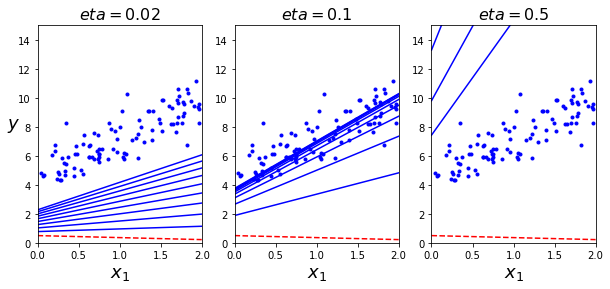

In [0]:
theta_path_bgd = []

def plot_gradient_descent(theta,eta,theta_path=None):
  m = len(X_b)
  plt.plot(X,y,"b.")
  n_iterations = 1000
  
  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      style = "b-" if iteration > 0 else "r--"
      plt.plot(X_new,y_predict,style)
  
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
  
    if theta_path is not None:
      theta_path.append(theta)
    
  plt.xlabel("$x_1$",fontsize = 18)
  plt.axis([0,2,0,15])
  plt.title(r"$eta = {}$".format(eta),fontsize = 16)
  
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize = (10,4))
plt.subplot(131); plot_gradient_descent(theta,eta = 0.02)
plt.ylabel("$y$",rotation=0,fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta,eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta,eta = 0.5)
plt.show()
  

# 스토캐스틱 경사 하강법을 사용한 선형회귀 접근
### BGD 같은 경우 데이터가 무수히 많을 경우 전체 데이터를 고려하므로 연산에 대한 Cost가 매우 커지게 된다. 이러한 단점을 극복하기 위해서 나온 방법이 Stochastic Gradient Descent(SGD)이다.
### SGD 의 경우 BGD와 달리 1개의 데이터를 랜덤으로 고려하여 각 데이터에 대해 Loss function 을 계산하고, 그 함수를 최소화하는 방향으로 W를 업데이트한다.


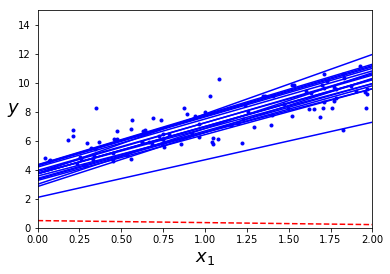

In [0]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0,t1 = 5, 50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:
      y_predict = X_new_b.dot(theta)
      style = "b-" if i > 0 else "r--"
      plt.plot(X_new,y_predict,style)
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta*gradients
    theta_path_sgd.append(theta)
    
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0,2,0,15])
plt.show()


In [0]:
print(theta)

[[4.61758796]
 [2.51807051]]


In [0]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1, random_state = 42)

sgd_reg.fit(X,y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.68600374] [2.67736371]


# 미니배치 경사 하강법을 사용한 선형회귀 접근
### SGD의 단점인 느린 수렴속도와 수렴하지 못하고 이상한 부분에서 왔다갔다 하는 현상을 보완하기 위해 Mini-batch Gradient Descent(MGD)를 사용한다.
### MGD는 예를 들면 10000개의 데이터가 존재하면 100개씩 미니 배치를 만들어 각 100개씩 BGD 방식으로 W를 갱신한다.
### 현재 우리 데이터에서는 100개의 데이터를 20개씩 5개의 미니 배치를 만들어 theta를 계산한다.

In [0]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2,1)
t0,t1 = 200,1000

def learning_schedule(t):
  return t0/(t+t1)

t = 0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  
  for i in range(0,m,minibatch_size):
    t += 1
    xi = X_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]
    gradients = 2/minibatch_size*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(t)
    theta = theta - eta*gradients
    theta_path_mgd.append(theta)
    
print(theta)
  


[[4.60626851]
 [2.58436946]]


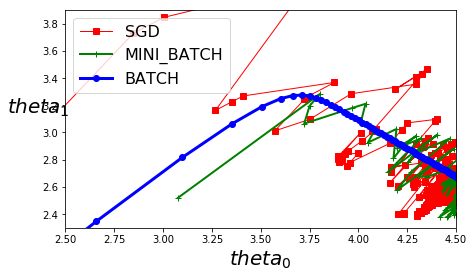

In [0]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize = (7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth = 1, label = "SGD")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",linewidth = 2, label = "MINI_BATCH")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],"b-o",linewidth = 3, label = "BATCH")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$theta_0$",fontsize = 20)
plt.ylabel(r"$theta_1$",fontsize = 20, rotation = 0)
plt.axis([2.5,4.5,2.3,3.9])
plt.show()


# 다차항 회귀 (Polynomial Regression)


# Data 생성 및 시각화
### X 는 -3 ~ 3 까지의 난수
### y 는 0.5x^2 + x + 2 그래프에 노이즈를 추가한 변수

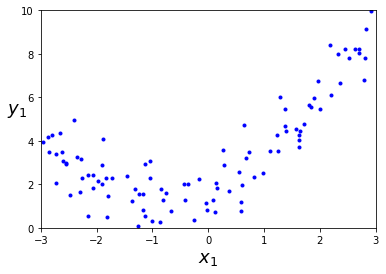

In [0]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize = 18)
plt.ylabel("$y_1$",rotation = 0, fontsize = 18)
plt.axis([-3,3,0,10])
plt.show()

# Packge 를 이용한 다항 회귀 모델 생성
### sklearn의 PolynomialFeatures 클래스 이용

In [0]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures 클래스 생성
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_,lin_reg.coef_)

[1.78134581] [[0.93366893 0.56456263]]


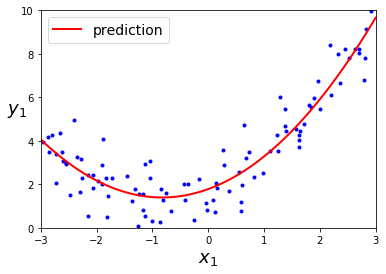

In [0]:
X_new = np.linspace(-3,3,100).reshape(100,1)
#print(X_new)
X_new_poly = poly_features.transform(X_new)
#print(X_new_poly)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,"b.")
plt.plot(X_new, y_new, "r-", linewidth = 2, label="prediction")
plt.xlabel("$x_1$",fontsize = 18)
plt.ylabel("$y_1$",rotation = 0, fontsize = 18)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([-3,3,0,10])
plt.show()

# StandardScaler
### 현재 가지고 있는 데이터를 분산 : 1 평균 : 0 으로 전처리를 해준다.

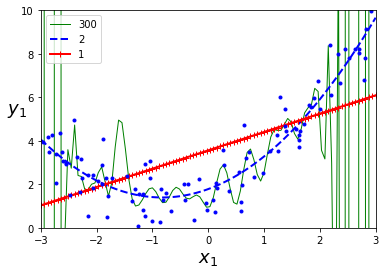

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# polyfeatures : 300차 함수로 fitting, std_scaler : 2차함수로 fitting, linear : 1차함수 fitting 
for style,width,degree in (("g-",1,300),("b--",2,2),("r-+",2,1)):
  polybig_features = PolynomialFeatures(degree=degree, include_bias = False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
      ("poly_features",polybig_features),
      ("std_scaler",std_scaler),
      ("lin_reg",lin_reg)  
  ])
  polynomial_regression.fit(X,y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new, y_newbig, style, label=str(degree), linewidth = width)

plt.plot(X,y,"b.",linewidth = 3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$",fontsize = 18)
plt.ylabel("$y_1$", rotation = 0, fontsize = 18)
plt.axis([-3,3,0,10])
plt.show()
  

# Ridge Regression
### 규제가 추가된 선형 회귀 버전
### 규제항이 cost function에 추가
### 모델의 가중치가 가능한 한 작게 유지되도록 노력한다.
### 선형 데이터에 다른 alpha 값을 사용해 모델을 훈련. 오른쪽 그래프의 경우, PolynomialFeatures(degree=10)을 사용해 먼저 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델 적용.
### alpha 값을 증가시킬수록 직선에 가까워 지는 현상이 발견.

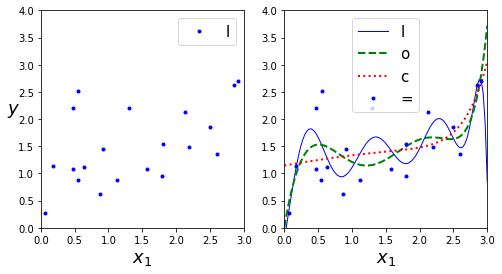

In [0]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

np.random.seed(42)
m = 20
X = 3*np.random.rand(m,1)
y = 1 + 0.5*X + np.random.randn(m,1)/1.5

X_new = np.linspace(0,3,100).reshape(100,1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
  for alpha,style in zip(alphas, ("b-","g--","r:")):
    model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
    if polynomial:
      model = Pipeline([
          ("poly_features",PolynomialFeatures(degree=10, include_bias=False)),
          ("std_scaler",StandardScaler()),
          ("regul_reg",model),
      ])
      model.fit(X,y)
      y_new_regul = model.predict(X_new)
      lw = 2 if alpha > 0 else 1
      plt.plot(X_new, y_new_regul, style, linewidth = lw, label = r"$￦alpha = {}$".format(alpha))
  plt.plot(X,y,"b.",linewidth = 3)
  plt.legend("loc=upper left", fontsize = 15)
  plt.xlabel("$x_1$",fontsize = 18)
  plt.axis([0,3,0,4])

plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(Ridge,polynomial = False, alphas = (0,10,100),random_state = 42)
plt.ylabel("$y$",rotation = 0, fontsize = 18)
plt.subplot(122)
plot_model(Ridge,polynomial = True, alphas = (0,10**-5, 1), random_state = 42)
plt.show()
      

# 활성 함수
## sigmoid : 로지스틱 함수라고 하며, x값에 변화에 따라 0 ~ 1 값을 출력. (다층 퍼셉트론)
## step function : x값이 0이하 일때 0, 이상일때 1을 출력. (단일 퍼셉트론)
## ReLU : Gradient Vanishing 문제를 해결하기 위한 함수, x값이 음수일 경우 0을 출력. (다층 퍼셉트론)
## tanh : sigmoid function을 재활용하여 -1 ~ 1 범위를 갖는 함수. (다층 퍼셉트론)

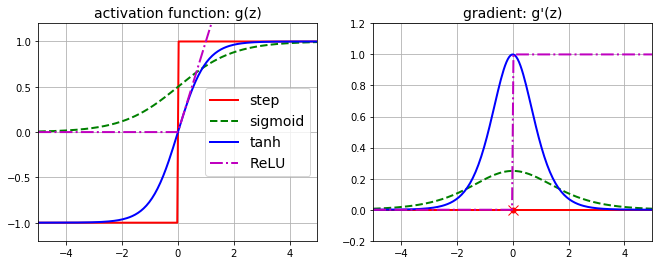

In [0]:
from __future__ import division, print_function, unicode_literals

import os
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# logit : sigmoid
def logit(z):
  return 1/(1+np.exp(-z))

# relu : ReLU
def relu(z):
  return np.maximum(0,z)

# 도함수
def derivative(f,z,eps=0.000001):
  return (f(z+eps) - f(z-eps))/(2*eps)

z = np.linspace(-5,5,200)

plt.figure(figsize = (11,4))

plt.subplot(121)
plt.plot(z,np.sign(z),"r-",linewidth = 2, label = "step")
plt.plot(z,logit(z),"g--",linewidth = 2, label = "sigmoid")
plt.plot(z,np.tanh(z),"b-",linewidth = 2, label = "tanh")
plt.plot(z,relu(z),"m-.",linewidth = 2, label = "ReLU")
plt.grid(True)
plt.legend(loc = "center right",fontsize = 14)
plt.title("activation function: g(z)",fontsize = 14)
plt.axis([-5,5,-1.2,1.2])

plt.subplot(122)
plt.plot(z,derivative(np.sign,z),"r-",linewidth=2, label="step")
plt.plot(0,0,"ro",markersize = 5)
plt.plot(0,0,"rx",markersize = 10)
plt.plot(z,derivative(logit,z),"g--", linewidth = 2, label = "sigmoid")
plt.plot(z,derivative(np.tanh,z),"b-", linewidth = 2, label = "tanh")
plt.plot(z,derivative(relu,z),"m-.", linewidth = 2, label = "ReLU")
plt.grid(True)
plt.title("gradient: g'(z)",fontsize = 14)
plt.axis([-5,5,-0.2,1.2])

plt.show()





# 오류 역전파

## 해당 연산망의 그래프 연산을 손으로 작성

In [0]:
import numpy as np
np.random.seed(0)

N,D = 3,4

x = np.random.randn(N,D)
y = np.random.randn(N,D)
z = np.random.randn(N,D)

a = x*y
b = a + z
c = np.sum(b)

from IPython.display import Image
Image("1_1.png")

In [0]:
grad_c = 1.0
grad_b = grad_c*np.ones((N,D))
grad_a = grad_b.copy()
grad_z = grad_b.copy()
grad_x = grad_a*y
grad_y = grad_a*x

print("grad_c : " , grad_c)
print("grad_b : " , grad_b)
print("grad_a : " , grad_a)
print("grad_z : " , grad_z)
print("grad_x : " , grad_x)
print("grad_y : " , grad_y)

grad_c :  1.0
grad_b :  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_a :  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_z :  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
grad_x :  [[ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502]]
grad_y :  [[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]]


## (2) 와 (3) 의 차이 점
### (2) 의 경우 : 수동으로 진행
### (3) 의 경우 : 자동으로 진행

In [0]:
import torch

x = torch.randn(N,D,requires_grad=True)
y = torch.randn(N,D,requires_grad=True)
z = torch.randn(N,D)

a = x*y
b = a+z
c = torch.sum(b)

c.backward()

print(x.grad)
print(y.grad)

tensor([[ 0.5873,  0.2411,  1.9175,  1.4268],
        [ 1.3673, -1.2458, -0.4462,  1.8146],
        [-0.9656, -1.4032, -1.4447, -0.8649]])
tensor([[ 1.6149, -1.2526,  0.0399, -0.4973],
        [-0.1885,  0.2304,  0.8564,  0.4202],
        [ 0.8840,  0.0660, -0.4256,  1.1056]])


# 신경망 학습

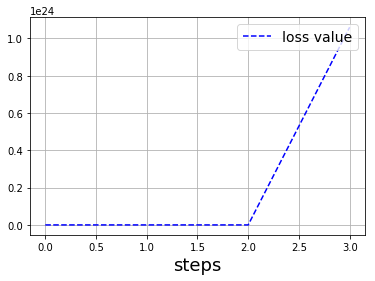

In [0]:
import torch

# N : 배치의 크기, D_in : 입력 차원, H : 은닉층, D_out : 출력층
N, D_in, H, D_out = 64,1000,100,10

x = torch.randn(N,D_in)
y = torch.randn(N,D_out)

w1 = torch.randn(D_in,H, requires_grad = True)
w2 = torch.randn(H,D_out, requires_grad = True)

# 학습률
learning_rate = 10e-6

diff_loss = list()
axis_t = [i for i in range(0,500)]

for t in range(500):
  # 순전파 계산
  y_pred = x.mm(w1).clamp(min=0).mm(w2)
  # 실시간 loss 계산
  loss = (y_pred - y).pow(2).sum()
  # 역전파 계산
  loss.backward()
  diff_loss.append(loss)
  
  with torch.no_grad():
    w1 -= learning_rate*w1.grad
    w2 -= learning_rate*w2.grad
    # 가중치 갱신 후 0으로 갱신
    w1.grad.zero_()
    w2.grad.zero_()
    
plt.plot(axis_t, diff_loss, "b--", label = "loss value")
plt.grid(True)
plt.xlabel("steps",fontsize = 18)
plt.legend(loc = "upper right", fontsize = 14)
plt.show()

# 7번
## A : 1000       0.05
## B : 2000       0.10
## C : 3000       0.10


In [0]:
# 만약 3개의 제조사로부터 구매한 IC가 섞여 있는 경우, 임의로 선택한 IC가 불량일 확률은?
n_a = 1000
n_b = 2000
n_c = 3000

n_a_inf = n_a*0.05
n_b_inf = n_b*0.10
n_c_inf = n_c*0.10

print("A 불량품 : ",n_a_inf)
print("B 불량품 : ",n_b_inf)
print("C 불량품 : ",n_c_inf)


sol1 = (n_a_inf + n_b_inf + n_c_inf)/(n_a + n_b + n_c)

print("Sol1 : ",sol1)

A 불량품 :  50.0
B 불량품 :  200.0
C 불량품 :  300.0
Sol1 :  0.09166666666666666


In [0]:
# 임의로 선택한 IC가 불량인 경우, 그것이 제조사 A로부터 만들어질 확률은 얼마인가?
sol2 = n_a_inf/(n_a_inf + n_b_inf + n_c_inf)

print("Sol2 : ", sol2)

Sol2 :  0.09090909090909091


# 8번
## 대학원생 : 1000     0.25
## 학 부 생  : 2000      0.10


In [0]:
n_d = 1000
n_e = 2000

n_d_dom = n_d*0.25
n_e_dom = n_e*0.10

print("기숙사 대학원생 : ", n_d_dom)
print("기숙사 학부생 : ", n_e_dom)

기숙사 대학원생 :  250.0
기숙사 학부생 :  200.0


In [0]:
# 1. 한 학생을 임의로 선정한 경우, 그 학생이 기숙사에 살고 있는 학부생일 확률은 얼마인가?
ans_1 = n_e_dom/(n_d+n_e)

print("ans1 : ", ans_1)

ans1 :  0.06666666666666667


In [0]:
# 기숙사에 살고 있는 한 학생을 임의로 선정한 경우, 그 학생이 대학원생일 확률은 얼마인가?
ans_2 = n_d_dom/(n_d_dom + n_e_dom)

print("ans2 : ", ans_2)

ans2 :  0.5555555555555556


In [0]:
from IPython.display import Image
Image("45.png")

## (1) 해당 퍼셉트론에 의해 결정되는 결정평면의 방향과 원점에서의 거리를 구하세요.
### w1x1 + w2x2 + w3x3 = 1.0
### (1.3)x1 + (0.9)x2 + (0.7)x3 - 1 =0
### 법선 벡터 = [1.3, 0.9, 0.7]
### 거리(h) = abs(-1)/sqrt(1.3^2 + 0.9^2 + 0.7^2)

In [0]:
h = abs(-1)/np.sqrt(1.3**2 + 0.9**2 + 0.7**2)

print("h : ", h)


h :  0.5783149319662402


## T = 2.0, T = 0.0 으로 바꾸기 위해 퍼셉트론을 수정하고, 결정 평면의 변화를 설명하세요.
## T = 2.0 일때,
## (1.3)x1 + (0.9)x2 + (0.7)x3 - 2 =0
### 거리(h1) = abs(-2)/sqrt(1.3^2 + 0.9^2 + 0.7^2) = 1.15662

## T = 0.0 일때,
## (1.3)x1 + (0.9)x2 + (0.7)x3 =0
### 거리(h2) = abs(0)/sqrt(1.3^2 + 0.9^2 + 0.7^2) = 0

In [0]:
h1 = abs(-2)/np.sqrt(1.3**2 + 0.9**2 + 0.7**2)

print("h1 : ", h1)

h1 :  1.1566298639324804


In [0]:
from IPython.display import Image
Image("12.png")

## (1) y(t) : 실제값    wT(t)x(t) : 잘못된 값  -> 따라서 항상 부호가 정반대 < 0
## (2) y(t)wT(t+1)x(t) - y(t)wT(t)x(t) > 0
##      y(t)x(t){wT(t+1) - wT(t)} > 0
##      y(t)x(t){wT(t) + y(t)x(t) - wT(t)} > 0
##      y(t)x(t){y(t)x(t)} > 0
##      {x(t)^2}{y(t)^2} > 0
## (3) gradient => -y(t)x(t) > 0
## (4) wT * x = w0 + w1x1 + w2x2
##      w0 + w1x1 + w2x2 = 0
##      w2x2 = - w1x1 - w0
##      x2 = (-w1/w2)x1 - (w2/w0)
##      a = -w1/w2        ,   b = -w2/w0

In [0]:
from IPython.display import Image
Image("11.png")

In [0]:
# (1) 가중치 행렬을 표현하시오.
import numpy as np

U1 = np.array([[-0.3, 1.0, 1.2],[1.6, -1.0, -1.1]]).T
print(U1)

U2 = np.array([[1.0, 1.0, -1.0],[0.7, 0.5, 1.0]]).T
print(U2)

U3 = np.array([[0.5,-0.8,1.0],[-0.1,0.3,0.4]]).T
print(U3)

U4 = np.array([[1.0,0.1,-0.2],[-0.2,1.3,-0.4]]).T
print(U4)

[[-0.3  1.6]
 [ 1.  -1. ]
 [ 1.2 -1.1]]
[[ 1.   0.7]
 [ 1.   0.5]
 [-1.   1. ]]
[[ 0.5 -0.1]
 [-0.8  0.3]
 [ 1.   0.4]]
[[ 1.  -0.2]
 [ 0.1  1.3]
 [-0.2 -0.4]]


In [0]:
#(2) x = (1,0)T 일때 출력값 로지스틱 시그모이드를 사용

x = np.array([[1,1,0]])
#print(x)

# logit : sigmoid
def logit(z):
  return 1/(1+np.exp(-z))

y1 = U1.T.dot(x.T)
y1_sig = logit(y1)
#print(y1_sig)

x1 = np.array([[1,float(y1_sig[0]),float(y1_sig[1])]])
y2 = U2.T.dot(x1.T)
y2_sig = logit(y2)

x2 = np.array([[1,float(y2_sig[0]),float(y2_sig[1])]])
y3 = U3.T.dot(x2.T)
y3_sig = logit(y3)

x3 = np.array([[1,float(y3_sig[0]),float(y3_sig[1])]])
y4 = U4.T.dot(x3.T)
y4_sig = logit(y4)

print(y4_sig)

[[0.72021291]
 [0.60807077]]


In [0]:
#(3) x = (1,0)T 일때 출력값 ReLU를 사용

# relu : ReLU
def relu(z):
  return np.maximum(0,z)

x = np.array([[1,1,0]])

y1 = U1.T.dot(x.T)
y1_sig = relu(y1)
#print(y1_sig)

x1 = np.array([[1,float(y1_sig[0]),float(y1_sig[1])]])
y2 = U2.T.dot(x1.T)
y2_sig = relu(y2)

x2 = np.array([[1,float(y2_sig[0]),float(y2_sig[1])]])
y3 = U3.T.dot(x2.T)
y3_sig = relu(y3)

x3 = np.array([[1,float(y3_sig[0]),float(y3_sig[1])]])
y4 = U4.T.dot(x3.T)
y4_sig = relu(y4)

print(y4_sig)


[[0.949]
 [1.095]]


In [0]:
#(4) 
U3 = np.array([[0.5,-0.8,0.9],[-0.1,0.3,0.4]]).T
print(U3)

x = np.array([[1,1,0]])
#print(x)

# logit : sigmoid
def logit(z):
  return 1/(1+np.exp(-z))

y1 = U1.T.dot(x.T)
y1_sig = logit(y1)
#print(y1_sig)

x1 = np.array([[1,float(y1_sig[0]),float(y1_sig[1])]])
y2 = U2.T.dot(x1.T)
y2_sig = logit(y2)

x2 = np.array([[1,float(y2_sig[0]),float(y2_sig[1])]])
y3 = U3.T.dot(x2.T)
y3_sig = logit(y3)

x3 = np.array([[1,float(y3_sig[0]),float(y3_sig[1])]])
y4 = U4.T.dot(x3.T)
y4_sig = logit(y4)

print("< new_y4_sig_sigmoid >")
print(y4_sig)


def relu(z):
  return np.maximum(0,z)

x = np.array([[1,1,0]])

y1 = U1.T.dot(x.T)
y1_sig = relu(y1)
#print(y1_sig)

x1 = np.array([[1,float(y1_sig[0]),float(y1_sig[1])]])
y2 = U2.T.dot(x1.T)
y2_sig = relu(y2)

x2 = np.array([[1,float(y2_sig[0]),float(y2_sig[1])]])
y3 = U3.T.dot(x2.T)
y3_sig = relu(y3)

x3 = np.array([[1,float(y3_sig[0]),float(y3_sig[1])]])
y4 = U4.T.dot(x3.T)
y4_sig = relu(y4)

print("< new_y_sig_ReLU >")
print(y4_sig)



[[ 0.5 -0.1]
 [-0.8  0.3]
 [ 0.9  0.4]]
< new_y4_sig_sigmoid >
[[0.7198378 ]
 [0.60229099]]
< new_y_sig_ReLU >
[[0.9325]
 [0.8805]]


In [0]:
from IPython.display import Image
Image("13.png")

In [0]:
from IPython.display import Image
Image("1_4.png")